In [1]:
import os
os.chdir("../..")
import datetime
import math
import pandas as pd
import numpy as np

# local import 
from scripts.python.PdfParse import *
from scripts.python.ts_utils import *
from scripts.python.utils import *

## Data Wrangling
### VU's aviation data

In [2]:
aviation_path = os.getcwd() + "/data/tourism/aviation_seats_flights_pic.xlsx"
aviation = pd.read_excel(aviation_path)
aviation.head(5)

,Country,ISO,Region,Date,Aircraft_type,Seats_arrivals_domestic,Seats_arrivals_interregional,Seats_arrivals_intraregional,Seats_arrivals_intl,Seats_arrivals_total,Available_seat_kilometers,Number_of_flights_domestic,Number_of_flights_interregional,Number_of_flights_intraregional,Number_of_flights_intl,Number_of_flights_total
0,Fiji,FJ,East Asia & Pacific,2019-01-01,passenger,839,273,3480,3753,4592,1.430416e+07,8,1,10,11,19
1,Fiji,FJ,East Asia & Pacific,2019-01-02,passenger,974,313,3471,3784,4758,1.495610e+07,8,1,10,11,19
2,Fiji,FJ,East Asia & Pacific,2019-01-03,passenger,1190,443,3675,4118,5308,1.592143e+07,10,2,12,14,24
3,Fiji,FJ,East Asia & Pacific,2019-01-04,passenger,831,586,3159,3745,4576,1.457334e+07,7,2,12,14,21
4,Fiji,FJ,East Asia & Pacific,2019-01-05,passenger,744,273,4752,5025,5769,1.773449e+07,7,1,12,13,20


In [3]:
vu_avi = (aviation[(aviation.ISO == "VU") & (aviation.Aircraft_type == "passenger")]
          .reset_index()
          .drop("index", axis=1)
          [["Date", "Number_of_flights_intl", "Number_of_flights_total",
            "Seats_arrivals_intl", "Seats_arrivals_total"]])

dates = pd.DataFrame(pd.date_range(start="2019-01-01",
                                   end="2022-10-16"), columns=["Date"])

vu_avi = dates.merge(vu_avi, how="left", on="Date")
vu_avi["Date"] = pd.to_datetime(vu_avi["Date"])
vu_avi["Month"], vu_avi["Year"] = vu_avi["Date"].dt.month, vu_avi["Date"].dt.year
vu_avi.head(5)

,Date,Number_of_flights_intl,Number_of_flights_total,Seats_arrivals_intl,Seats_arrivals_total,Month,Year
0,2019-01-01,4.0,4.0,552.0,552.0,1,2019
1,2019-01-02,4.0,4.0,584.0,584.0,1,2019
2,2019-01-03,3.0,3.0,408.0,408.0,1,2019
3,2019-01-04,4.0,4.0,674.0,674.0,1,2019
4,2019-01-05,4.0,4.0,652.0,652.0,1,2019


In [4]:
vu_avi_19_22 = vu_avi.groupby(by=["Year", "Month"]).sum().reset_index()
vu_avi_19_22.head(5)

,Year,Month,Number_of_flights_intl,Number_of_flights_total,Seats_arrivals_intl,Seats_arrivals_total
0,2019,1,123.0,123.0,18568.0,18568.0
1,2019,2,94.0,97.0,13680.0,14190.0
2,2019,3,101.0,101.0,14774.0,14774.0
3,2019,4,112.0,112.0,17071.0,17071.0
4,2019,5,111.0,111.0,16764.0,16764.0


### VU's Parsed Files

In [5]:
parsed_folder = os.getcwd() + "/data/tourism/vanuatu/byorigin/"
filepaths = os.listdir(parsed_folder)
filepaths = [parsed_folder + file for file in filepaths]

In [6]:
vu_parsed = pd.DataFrame()

for file in filepaths:
    filename = file.split("/")[-1]
    match = re.search(r'\d{4}', filename)
    print(f"{filename} has started.")
    df = pd.read_csv(file)
    df = (df.replace(r"\[p\]", "", regex=True)
            .drop("Unnamed: 0", axis=1)
            .fillna(method="ffill"))
    df = df.rename({"Quarter": "Month",
                    "Chine": "China",
                    "Japon": "Japan",
                    "Australie": "Australia",
                    "Caledonia": "New Caledonia",
                    "Zealand": "New Zealand",
                    "America": "North America",
                    "Stated": "Not Stated",
                    "Countries": "Other Countries"}, axis=1)
    if match:
        df["fileyear"] = match.group()
    if "Month" and "Year" in df.columns:
        vu_parsed = (pd.concat([vu_parsed, df], axis=0)
                       .reset_index()
                       .sort_values(by="Year", ascending=True)
                       .drop("index", axis=1))
    else:
        pass
        print(f"{filename} has no Year or Month Column.")
    print(f"{filename} has ended.")

IVA_3_March_2022.csv has started.
IVA_3_March_2022.csv has ended.
IVA_7_July_2022.csv has started.
IVA_7_July_2022.csv has ended.
IVA_4_April_2022.csv has started.
IVA_4_April_2022.csv has ended.
IVA_1_January_2022.csv has started.
IVA_1_January_2022.csv has ended.
IVA_12_December-English_2019.csv has started.
IVA_12_December-English_2019.csv has ended.
IVA_5_May_2022.csv has started.
IVA_5_May_2022.csv has ended.
IAS_12_December_2018.csv has started.
IAS_12_December_2018.csv has ended.
IAS_12_Dececember_2017.csv has started.
IAS_12_Dececember_2017.csv has ended.
IVA_12_Dec_2020.csv has started.
IVA_12_Dec_2020.csv has ended.
2013-TM-12-December_News.csv has started.
2013-TM-12-December_News.csv has ended.
Tou12_December_2006.csv has started.
Tou12_December_2006.csv has ended.
TM12_December_2008_News.csv has started.
TM12_December_2008_News.csv has ended.
TM12_December_2009_News.csv has started.
TM12_December_2009_News.csv has ended.
IVA_12_December_2021.csv has started.
IVA_12_Decembe

#### Datetime Transformation

In [7]:
# Create a month abbreviation dictionary
month_equv = {}
for i in range(1, 13):
    month_abbre = datetime.date(1900, i, 1).strftime('%b')
    month_full = datetime.date(1900, i, 1).strftime('%B')
    month_equv.update({month_full: i, month_abbre: i})

# Cross-check with the existing values
month_lst = vu_parsed.Month.unique().tolist()
for key, val in month_equv.items():
    if key in month_lst:
        month_lst.remove(key)
        
print(month_lst)

[nan, '4th', '3rd', '1st', '2nd', 'Apr*', '', 'Ap']


In [8]:
# Update the matching dictionary 
month_equv.update({'Apr*': 4, 'Ap': 4})

In [9]:
vu_parsed = (vu_parsed
             .replace(r"\*", "", regex=True)
             .drop_duplicates()
             .reset_index()
             .drop("index", axis=1)
             .fillna(0))

vu_parsed["month"] = vu_parsed["Month"].map(month_equv)


# Check the failed mappings
for idx in vu_parsed.index:
    month = vu_parsed["month"][idx]
    if math.isnan(month) == False:
        pass
    else:
        print(idx, vu_parsed["Year"][idx], vu_parsed["Month"][idx])

1 2002.0 0
2 2003.0 4th
3 2003.0 3rd
5 2003.0 1st
6 2003.0 0
8 2003.0 2nd
10 2004.0 3rd
11 2004.0 1st
13 2004.0 0
18 2004.0 2nd
20 2004.0 4th
30 2005.0 2nd
31 2005.0 0
35 2005.0 3rd
44 2005.0 4th
46 2005.0 1st
131 2009.0 0
152 2010.0 0
154 2010.0 0
164 2011.0 0
165 2011.0 0
176 2011.0 0
192 2012.0 0
195 2012.0 0
199 2012.0 0
201 2012.0 0
227 2013.0 0
232 2013.0 0
233 2013.0 0
236 2013.0 0
246 2013.0 0
250 2013.0 0
255 2014.0 0
258 2014.0 0
259 2014.0 0
262 2014.0 0
267 2014.0 0
285 2014.0 0
290 2015.0 0
308 2015.0 0
312 2015.0 0
314 2015.0 0
319 2015.0 0
322 2015.0 0
326 2016.0 0
335 2016.0 0
343 2016.0 0
344 2016.0 0
345 2016.0 0
346 2016.0 0
348 2016.0 0
352 2017.0 0
353 2017.0 0
356 2017.0 0
359 2017.0 0
373 2017.0 0
375 2017.0 0
378 2018.0 0
386 2018.0 0
399 2018.0 0
401 2018.0 0
402 2018.0 0
404 2019.0 0
410 2019.0 
413 2019.0 0
432 2020.0 0
448 2020.0 0
469 2021.0 0


In [10]:
# Convert columns to float
cols = vu_parsed.columns[~vu_parsed.columns.isin(["Year", "Month", "month"])]
for col in cols:
    vu_parsed[col] = vu_parsed[col].astype(float)

In [11]:
# Check each Year's # of observations
stored_idx = (vu_parsed[vu_parsed.month.isna() == False]
              [vu_parsed.columns[~vu_parsed.columns.isin(["fileyear"])]]
              .drop_duplicates().index)

vu_parsed.loc[stored_idx, ["month", "Year"]].groupby(by="Year").count()

,month
Year,
2002.0,1
2003.0,1
2004.0,12
2005.0,13
2006.0,13
2007.0,13
2008.0,13
2009.0,12
2010.0,12


#### Quality Check

In [12]:
# Redefine the check_quality func from PdfParse.py
def check_quality(df: pd.DataFrame,
                  exclude_vars: list,
                  sum_var: str):
    
    """
    Return
    
    
    """

    new_df = df.iloc[:, ~df.columns.isin(exclude_vars)]
    checked_vars = new_df.columns[~new_df.columns.isin([sum_var])].to_list()
    correct_lst, error_lst, row_sums = [], [], []

    for idx in new_df.index:
        row_sum = 0
        for var in checked_vars:
            val = new_df[var][idx]
            if math.isnan(float(val)) != True:
                row_sum += float(val)
            else:
                row_sum += 0
        row_sums.append(row_sum)
        
        if float(new_df[sum_var][idx]) == float(row_sum):
            correct_lst.append(idx)
        else:
            error_lst.append(idx)

    # return True ## Previous version
    return correct_lst, error_lst, row_sums

In [13]:
correct_idx, error_idx, row_sums = check_quality(
    vu_parsed, ["Year", "Month", "month", "fileyear"], "Total")
vu_parsed["cal_row_sums"] = row_sums
vu_parsed["error"] = vu_parsed["Total"] - vu_parsed["cal_row_sums"]

In [14]:
vu_error = vu_parsed.iloc[error_idx].reset_index().drop("index", axis=1)
vu_error.to_csv(os.getcwd() + 
                "/data/tourism/vanuatu/intermediate/vu_monthly_error.csv", 
                encoding="utf-8")
vu_error

,Year,Month,Australia,New Zealand,New Caledonia,Other PIC,Europe,North America,Japan,China,Other Countries,Total,fileyear,Not Stated,month,cal_row_sums,error
0,2004.0,0,36407.0,8220.0,6630.0,3179.0,3388.0,1954.0,591.0,0.0,1084.0,61454.0,2005.0,0.0,NaN,61453.0,1.0
1,2004.0,4th,11588.0,2198.0,1925.0,933.0,887.0,399.0,141.0,0.0,265.0,18337.0,2005.0,0.0,NaN,18336.0,1.0
2,2005.0,Dec,3924.0,596.0,818.0,219.0,309.0,160.0,49.0,0.0,101.0,6177.0,2009.0,0.0,12.0,6176.0,1.0
3,2007.0,Mar,3618.0,570.0,422.0,368.0,280.0,176.0,69.0,0.0,264.0,5768.0,2007.0,0.0,3.0,5767.0,1.0
4,2007.0,May,3305.0,949.0,765.0,220.0,218.0,268.0,33.0,0.0,85.0,5842.0,2007.0,0.0,5.0,5843.0,-1.0
5,2007.0,Apr,3876.0,912.0,615.0,168.0,287.0,259.0,79.0,0.0,132.0,6329.0,2007.0,0.0,4.0,6328.0,1.0
6,2007.0,Dec,4809.0,902.0,905.0,374.0,361.0,155.0,58.0,0.0,155.0,7720.0,2008.0,0.0,12.0,7719.0,1.0
7,2007.0,Nov,4050.0,997.0,840.0,246.0,396.0,160.0,36.0,0.0,145.0,6869.0,2007.0,0.0,11.0,6870.0,-1.0
8,2007.0,Jul,4361.0,2717.0,764.0,357.0,405.0,409.0,109.0,0.0,181.0,9302.0,2007.0,0.0,7.0,9303.0,-1.0
9,2007.0,Oct,4175.0,1273.0,473.0,202.0,278.0,195.0,59.0,0.0,130.0,6786.0,2007.0,0.0,10.0,6785.0,1.0


In [15]:
# Re-assign value for the allowable error (equal/smaller than 1)
for idx in error_idx:
    if vu_parsed["error"][idx] <= 1:
        vu_parsed["Total"] = vu_parsed["cal_row_sums"]
    else:
        pass


lst = (vu_parsed.drop("fileyear", axis=1)
                .drop_duplicates()
                .index.tolist())

vu_parsed = (vu_parsed.iloc[lst][vu_parsed.month.isna() != True]
             .reset_index()
             .drop(["cal_row_sums", "error", "index"], axis=1)
             .sort_values(by=["Year", "month", "fileyear"]))

In [16]:
vu_parsed = (vu_parsed.drop_duplicates(subset=["Year", "month"], keep="last")
             .reset_index()
             .drop("index", axis=1))
vu_parsed.head(5)

,Year,Month,Australia,New Zealand,New Caledonia,Other PIC,Europe,North America,Japan,China,Other Countries,Total,fileyear,Not Stated,month
0,2002.0,Dec,3073.0,474.0,551.0,164.0,215.0,74.0,43.0,0.0,43.0,4637.0,2006.0,0.0,12.0
1,2003.0,Dec,2938.0,580.0,646.0,136.0,201.0,88.0,42.0,0.0,103.0,4734.0,2007.0,0.0,12.0
2,2004.0,Jan,2864.0,439.0,717.0,122.0,186.0,67.0,36.0,0.0,61.0,4492.0,2005.0,0.0,1.0
3,2004.0,Feb,2158.0,194.0,416.0,282.0,229.0,82.0,34.0,0.0,93.0,3488.0,2005.0,0.0,2.0
4,2004.0,Mar,2733.0,420.0,255.0,160.0,195.0,115.0,53.0,0.0,83.0,4014.0,2005.0,0.0,3.0


In [17]:
vu_count = (vu_parsed[["Year", "month"]]
            .groupby(by="Year")
            .count()
            .reset_index())
vu_count

,Year,month
0,2002.0,1
1,2003.0,1
2,2004.0,12
3,2005.0,12
4,2006.0,12
5,2007.0,12
6,2008.0,12
7,2009.0,12
8,2010.0,12
9,2011.0,12


In [18]:
vu_parsed.to_csv(
    os.getcwd() + "/data/tourism/vanuatu/intermediate/vu_monthly_visitor.csv", encoding="utf-8")

In [19]:
vu_19_22 = (vu_parsed[vu_parsed.Year >= 2019]
            .reset_index()
            .drop(["index", "Month"], axis=1)
            .rename({"month": "Month"}, axis=1)
            .sort_values(by=["Year", "Month"], ascending=True))

vu_19_22.head(5)

,Year,Australia,New Zealand,New Caledonia,Other PIC,Europe,North America,Japan,China,Other Countries,Total,fileyear,Not Stated,Month
0,2019.0,5251.0,767.0,1786.0,481.0,523.0,229.0,61.0,284.0,166.0,9548.0,2022.0,0.0,1.0
1,2019.0,2740.0,503.0,923.0,526.0,456.0,152.0,57.0,326.0,152.0,5835.0,2022.0,0.0,2.0
2,2019.0,3864.0,611.0,949.0,411.0,413.0,209.0,71.0,331.0,167.0,7026.0,2019.0,0.0,3.0
3,2019.0,5195.0,1010.0,1164.0,507.0,731.0,180.0,102.0,294.0,262.0,9445.0,2019.0,0.0,4.0
4,2019.0,3919.0,868.0,1139.0,552.0,806.0,294.0,60.0,425.0,296.0,8359.0,2019.0,0.0,5.0


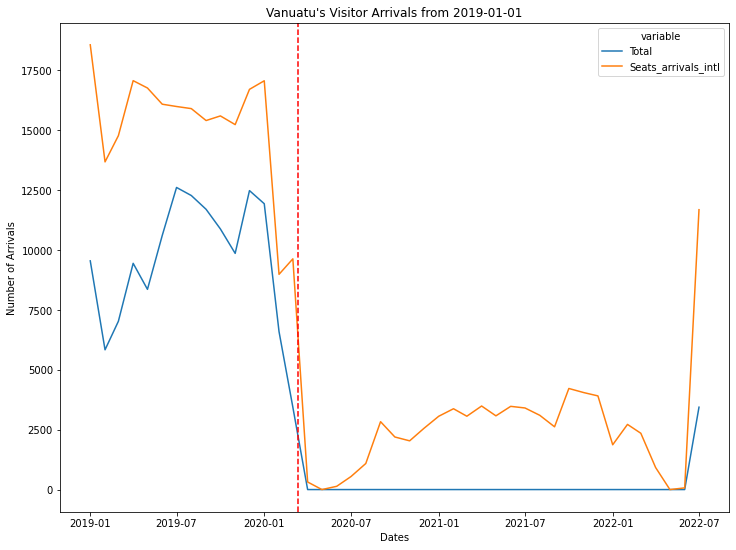

In [25]:
vu_merged["dates"] = pd.to_datetime([str(year) + "-" + str(month)
                                    for year, month in zip(vu_merged["Year"], vu_merged["Month"])])

viz_df = vu_merged[["dates", "Total", "Seats_arrivals_intl"]]
viz_df = pd.melt(viz_df, "dates")
viz_df["value"] = viz_df["value"].astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
# sns.set_style("whitegrid")
sns.lineplot(data=viz_df, x="dates", y="value", hue="variable")
plt.xlabel("Dates")
plt.axvline(datetime.datetime(2020, 3, 12), linestyle="dashed", color="red")
plt.ylabel("Number of Arrivals")
plt.title("Vanuatu's Visitor Arrivals from 2019-01-01")
# plt.xticks(rotation=45)
plt.savefig("vu.png", dpi=400)

In [24]:
vu_merged[["Total", "Seats_arrivals_intl"]].describe()

,Total,Seats_arrivals_intl
count,43.000000,43.000000
mean,3396.093023,6968.209302
std,4824.907410,6508.752893
min,0.000000,0.000000
25%,0.000000,2272.500000
50%,0.000000,3406.000000
75%,7692.500000,15005.000000
max,12612.000000,18568.000000


In [20]:
# dates = list()
# for year, month in zip(vu_parsed["Year"], vu_parsed["Month"]):
#     date = str(year).replace(".0", "") + "-" + str(month) + "-01"
#     dates.append(date)

# vu_parsed["Date"] = dates
# vu_parsed["Date"] = pd.to_datetime(vu_parsed["Date"])


# from bokeh.palettes import Category20
# from bokeh.plotting import figure, show, output_file
# from bokeh.models import ColumnDataSource, HoverTool, Legend


# output_file('vu_month_by_country.html')
# p = figure(height=600, width=1000,
#            title="Number of Passengers Per Month",
#            x_axis_type="datetime",
#            x_axis_label="Date",
#            y_axis_label="Number of Passengers Per Month",
#            tooltips=[("Date", "$Date"),
#                      ("Country", "$name"),
#                      ("Passenger per month", "@$name")])

# countries = vu_parsed.columns[~vu_parsed.columns.isin(["Year", "Month", "Total", "Date"])].to_list()
# p.add_layout(Legend(), 'right')
# source = ColumnDataSource(vu_parsed)

# for country, color in zip(countries, Category20[12]):
#     # have to use different colnames for y-coords so tooltip can refer to @$name
#     p.line('Date', country, source=source, name=country,
#            legend_label=country, color=color)

# p.legend.label_text_font_size = '9pt'
# p.legend.click_policy = "mute"
# p.legend.location = "top_left"

# show(p)

## EDA
### Correlation and Cross-correlation

In [23]:
vu_merged = vu_avi_19_22.merge(vu_19_22, how="left", on=["Year", "Month"]).dropna()
vu_merged.head(5)

,Year,Month,Number_of_flights_intl,Number_of_flights_total,Seats_arrivals_intl,Seats_arrivals_total,Australia,New Zealand,New Caledonia,Other PIC,Europe,North America,Japan,China,Other Countries,Total,fileyear,Not Stated
0,2019,1,123.0,123.0,18568.0,18568.0,5251.0,767.0,1786.0,481.0,523.0,229.0,61.0,284.0,166.0,9548.0,2022.0,0.0
1,2019,2,94.0,97.0,13680.0,14190.0,2740.0,503.0,923.0,526.0,456.0,152.0,57.0,326.0,152.0,5835.0,2022.0,0.0
2,2019,3,101.0,101.0,14774.0,14774.0,3864.0,611.0,949.0,411.0,413.0,209.0,71.0,331.0,167.0,7026.0,2019.0,0.0
3,2019,4,112.0,112.0,17071.0,17071.0,5195.0,1010.0,1164.0,507.0,731.0,180.0,102.0,294.0,262.0,9445.0,2019.0,0.0
4,2019,5,111.0,111.0,16764.0,16764.0,3919.0,868.0,1139.0,552.0,806.0,294.0,60.0,425.0,296.0,8359.0,2019.0,0.0


In [22]:
from scipy.stats import pearsonr

corr_seats, _ = pearsonr(vu_merged["Seats_arrivals_total"], vu_merged["Total"])
corr_seats_intl, _ = pearsonr(
    vu_merged["Seats_arrivals_intl"], vu_merged["Total"])
print(f"Pearson Correlation between FlightRadar's Seats Arrival and VU's census data is{corr_seats: .4f}.\n",
      f"Pearson Correlation between FlightRadar's # of Seats Arrival (International) and VU's census data is{corr_seats_intl: .4f}.")

Pearson Correlation between FlightRadar's Seats Arrival and VU's census data is 0.7154.
 Pearson Correlation between FlightRadar's # of Seats Arrival (International) and VU's census data is 0.9532.


In [23]:
incl_cols = ["Seats_arrivals_intl", "Seats_arrivals_total", "Total"]
vu_merged[incl_cols].corr()

,Seats_arrivals_intl,Seats_arrivals_total,Total
Seats_arrivals_intl,1.000000,0.825838,0.95315
Seats_arrivals_total,0.825838,1.000000,0.71540
Total,0.953150,0.715400,1.00000


In [24]:
vu_cc = cross_corr_df(vu_merged[incl_cols], "Seats_arrivals_intl", "Total")
vu_cc.head(5)

,lag,cross_corr_coef
0,0,0.953150
1,1,0.858637
2,2,0.776829
3,3,0.678026
4,4,0.558393


### Stationarity

In [25]:
get_adf_df(vu_merged[incl_cols], incl_cols)

,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
Seats_arrivals_intl,-1.942004,0.312566,0.0,42.0,-3.596636,-2.933297,-2.604991
Seats_arrivals_total,-2.296807,0.173000,0.0,42.0,-3.596636,-2.933297,-2.604991
Total,-2.526281,0.109210,10.0,32.0,-3.653520,-2.957219,-2.617588


In [26]:
vu_diff = vu_merged[incl_cols].diff().dropna()
get_adf_df(vu_diff, incl_cols)

,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
Seats_arrivals_intl,-5.319799,4.981572e-06,0.0,41.0,-3.600983,-2.935135,-2.605963
Seats_arrivals_total,-5.651792,9.822344e-07,0.0,41.0,-3.600983,-2.935135,-2.605963
Total,-4.688995,8.825123e-05,0.0,41.0,-3.600983,-2.935135,-2.605963


### Granger Causality

In [27]:
grangers_causation_matrix(vu_diff, incl_cols, maxlag=12)

,Seats_arrivals_intl_x,Seats_arrivals_total_x,Total_x
Seats_arrivals_intl_y,1.00000,0.04847,0.0
Seats_arrivals_total_y,0.00321,1.00000,0.0
Total_y,0.00000,0.00000,1.0
